In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
from openmxr.song import Song

song = Song.find(spotify_link="https://open.spotify.com/track/2ZhZ76JnLYcjFmcExTdxNF")

DEBUG:spotdl.download.downloader:Downloader settings: {'audio_providers': ['youtube-music'], 'lyrics_providers': ['genius', 'azlyrics', 'musixmatch'], 'playlist_numbering': False, 'scan_for_songs': False, 'm3u': None, 'output': '{artists} - {title}.{output-ext}', 'overwrite': 'skip', 'search_query': None, 'ffmpeg': 'ffmpeg', 'bitrate': None, 'ffmpeg_args': None, 'format': 'mp3', 'save_file': None, 'filter_results': True, 'threads': 4, 'cookie_file': None, 'restrict': False, 'print_errors': False, 'sponsor_block': False, 'preload': False, 'archive': None, 'load_config': True, 'log_level': 'INFO', 'simple_tui': False, 'fetch_albums': False, 'id3_separator': '/', 'ytm_data': False, 'add_unavailable': False, 'generate_lrc': False, 'force_update_metadata': False, 'only_verified_results': False, 'sync_without_deleting': False, 'max_filename_length': None}
DEBUG:spotdl.download.downloader:FFmpeg path: ffmpeg
DEBUG:asyncio:Using proactor: IocpProactor


Output()

DEBUG:spotdl.download.downloader:Found 0 known songs
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.azlyrics.com:443


DEBUG:urllib3.connectionpool:https://www.azlyrics.com:443 "GET / HTTP/1.1" 200 None


DEBUG:urllib3.connectionpool:https://www.azlyrics.com:443 "GET /geo.js HTTP/1.1" 200 None


DEBUG:spotdl.download.downloader:Archive: 0 urls
DEBUG:spotdl.download.downloader:Downloader initialized
DEBUG:spotdl.download.downloader:Downloader settings: {'audio_providers': ['youtube-music'], 'lyrics_providers': ['genius', 'azlyrics', 'musixmatch'], 'playlist_numbering': False, 'scan_for_songs': False, 'm3u': None, 'output': '{artists} - {title}.{output-ext}', 'overwrite': 'skip', 'search_query': None, 'ffmpeg': 'ffmpeg', 'bitrate': None, 'ffmpeg_args': None, 'format': 'mp3', 'save_file': None, 'filter_results': True, 'threads': 4, 'cookie_file': None, 'restrict': False, 'print_errors': False, 'sponsor_block': False, 'preload': False, 'archive': None, 'load_config': True, 'log_level': 'INFO', 'simple_tui': True, 'fetch_albums': False, 'id3_separator': '/', 'ytm_data': False, 'add_unavailable': False, 'generate_lrc': False, 'force_update_metadata': False, 'only_verified_results': False, 'sync_without_deleting': False, 'max_filename_length': None}
DEBUG:spotdl.download.downloader:F

DEBUG:spotdl.download.downloader:Archive: 0 urls
DEBUG:spotdl.download.downloader:Downloader initialized


INFO:root:Loading from spotify
DEBUG:root:SPOTIFY: loading ./.cache/spotify\1accefee133795ce36d4801ddc58b9dc.cache
DEBUG:root:YT: loading ./.cache/yt\0566bd1ea95981752ea3e678c7d36b89.cache
DEBUG:root:AUDIO: loading ./.cache/audio\0566bd1ea95981752ea3e678c7d36b89.cache
DEBUG:root:AUDIO: decompressing ./.cache/audio\0566bd1ea95981752ea3e678c7d36b89.cache


Decompressing:   0%|          | 0.00/37.6M [00:00<?, ?B/s]

DEBUG:root:AUDIO: converting ./.cache/audio\0566bd1ea95981752ea3e678c7d36b89.cache


INFO:root:loaded Harder (Shermanology Remix) - Radio Edit


In [2]:
from openmxr.spotify.analyze import SpotifyAnalysis, get_loudest


a = SpotifyAnalysis(song)
# print(a.sections)
print(get_loudest(a.sections))

DEBUG:root:SPOTIFY_ANALYSIS: loading ./.cache/spotify_analysis\4e6c3d85a9e390c9fd1963f81453c44d.cache


Section(start=97.68216, duration=30.23764, confidence=0.48, loudness=-7.011, tempo=128.892, tempo_confidence=0.778,
key=9, key_confidence=0.378, mode=1, mode_confidence=0.452, time_signature=4, time_signature_confidence=1.0)

In [3]:
import librosa
import numpy as np
from pychorus.constants import N_FFT
from pychorus.similarity_matrix import TimeTimeSimilarityMatrix, TimeLagSimilarityMatrix

def create_chroma(y, sr, n_fft=N_FFT):
    """
    Generate the notes present in a song

    Returns: tuple of 12 x n chroma, song wav data, sample rate (usually 22050)
             and the song length in seconds
    """
    
    song_length_sec = y.shape[0] / float(sr)
    S = np.abs(librosa.stft(y, n_fft=n_fft))**2
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)

    return chroma, y, sr, song_length_sec

chroma, _, sr, _ = create_chroma(song.resampled(22050, True), 22050)
time_time_similarity = TimeTimeSimilarityMatrix(chroma, sr)
time_lag_similarity = TimeLagSimilarityMatrix(chroma, sr)
num_samples = chroma.shape[1]

# Visualize the results
# print(time_lag_similarity.display())
# time_time_similarity.display()

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=1144)
           2	RESUME(arg=0, lineno=1144)
           4	LOAD_FAST(arg=0, lineno=1147)
           6	LOAD_CONST(arg=1, lineno=1147)
           8	BINARY_SUBSCR(arg=None, lineno=1147)
          18	STORE_FAST(arg=3, lineno=1147)
          20	LOAD_FAST(arg=1, lineno=1148)
          22	UNARY_NEGATIVE(arg=None, lineno=1148)
          24	LOAD_FAST(arg=3, lineno=1148)
          26	SWAP(arg=2, lineno=1148)
          28	COPY(arg=2, lineno=1148)
          30	COMPARE_OP(arg=1, lineno=1148)
          36	POP_JUMP_FORWARD_IF_FALSE(arg=6, lineno=1148)
          38	LOAD_FAST(arg=1, lineno=1148)
          40	COMPARE_OP(arg=1, lineno=1148)
          46	POP_JUMP_FORWARD_IF_FALSE(arg=5, lineno=1148)
          48	JUMP_FORWARD(arg=2, lineno=1148)
>         50	POP_TOP(arg=None, lineno=1148)
          52	JUMP_FORWARD(arg=2, lineno=1148)
>         54	LOAD_CONST(arg=1, lineno=1149)
          56	STORE_FAST(arg=3, lineno=1149)
>         58

DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=92, stack=('$x178.5',), blockstack=(), npush=0), Edge(pc=104, stack=('$x178.5',), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=58 nstack_initial=0), State(pc_initial=54 nstack_initial=0), State(pc_initial=92 nstack_initial=1), State(pc_initial=104 nstack_initial=1)])
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=54 nstack_initial=0), State(pc_initial=92 nstack_initial=1), State(pc_initial=104 nstack_initial=1)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:state.pc_initial: State(pc_initial=54 nstack_initial=0)
DEBUG:numba.core.byteflow:dispatch pc=54, inst=LOAD_CONST(arg=1, lineno=1149)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=56, inst=STORE_FAST(arg=3, lineno=1149)
DEBUG:numba.core.byteflow:stack ['$const54.0']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=58, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending

DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi38.0': '$x024.5'},
             State(pc_initial=58 nstack_initial=0): {'$phi92.0': '$x178.5'}})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {}), (4, {'res': '$x4.0'}), (6, {'res': '$const6.1'}), (8, {'index': '$const6.1', 'target': '$x4.0', 'res': '$8binary_subscr.2'}), (10, {}), (12, {}), (14, {}), (16, {}), (18, {'value': '$8binary_subscr.2'}), (20, {'res': '$threshold20.3'}), (22, {'value': '$threshold20.3', 'res': '$22unary_negative.4'}), (24, {'res': '$x024.5'}), (30, {'lhs': '$22unary_negative.4', 'rhs': '$x024.5', 'res': '$30compare_op.6'}), (32, {}), (34, {}), (36, {'pred': '$30compare_op.6'})), outgoing_phis={'$phi38.0': '$x024.5'}, blockstack=(), active_try_block=None, outgoing_edgepushed={38: ('$x024.5',)

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=1051)
           2	RESUME(arg=0, lineno=1051)
           4	LOAD_FAST(arg=0, lineno=1054)
           6	LOAD_CONST(arg=1, lineno=1054)
           8	BINARY_SUBSCR(arg=None, lineno=1054)
          18	LOAD_FAST(arg=0, lineno=1054)
          20	LOAD_CONST(arg=2, lineno=1054)
          22	BINARY_SUBSCR(arg=None, lineno=1054)
          32	COMPARE_OP(arg=4, lineno=1054)
          38	LOAD_FAST(arg=0, lineno=1054)
          40	LOAD_CONST(arg=1, lineno=1054)
          42	BINARY_SUBSCR(arg=None, lineno=1054)
          52	LOAD_FAST(arg=0, lineno=1054)
          54	LOAD_CONST(arg=3, lineno=1054)
          56	BINARY_SUBSCR(arg=None, lineno=1054)
          66	COMPARE_OP(arg=5, lineno=1054)
          72	BINARY_OP(arg=1, lineno=1054)
          76	RETURN_VALUE(arg=None, lineno=1054)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:state.pc

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=430)
           2	RESUME(arg=0, lineno=430)
           4	LOAD_FAST(arg=0, lineno=434)
           6	LOAD_CONST(arg=1, lineno=434)
           8	BINARY_SUBSCR(arg=None, lineno=434)
          18	LOAD_FAST(arg=0, lineno=434)
          20	LOAD_CONST(arg=2, lineno=434)
          22	BINARY_SUBSCR(arg=None, lineno=434)
          32	BINARY_OP(arg=0, lineno=434)
          36	LOAD_CONST(arg=3, lineno=434)
          38	LOAD_FAST(arg=0, lineno=434)
          40	LOAD_CONST(arg=4, lineno=434)
          42	BINARY_SUBSCR(arg=None, lineno=434)
          52	BINARY_OP(arg=5, lineno=434)
          56	BINARY_OP(arg=10, lineno=434)
          60	STORE_FAST(arg=1, lineno=434)
          62	LOAD_FAST(arg=0, lineno=435)
          64	LOAD_CONST(arg=1, lineno=435)
          66	BINARY_SUBSCR(arg=None, lineno=435)
          76	LOAD_FAST(arg=0, lineno=435)
          78	LOAD_CONST(arg=2, lineno=435)
          80	BINARY_SUBSCR(arg=None, lineno=435

DEBUG:numba.core.byteflow:dispatch pc=100, inst=STORE_FAST(arg=2, lineno=435)
DEBUG:numba.core.byteflow:stack ['$binop_truediv96.21']
DEBUG:numba.core.byteflow:dispatch pc=102, inst=LOAD_GLOBAL(arg=1, lineno=437)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=114, inst=LOAD_ATTR(arg=1, lineno=437)
DEBUG:numba.core.byteflow:stack ['$null$102.23', '$102load_global.22']
DEBUG:numba.core.byteflow:dispatch pc=124, inst=LOAD_FAST(arg=2, lineno=437)
DEBUG:numba.core.byteflow:stack ['$null$102.23', '$114load_attr.24']
DEBUG:numba.core.byteflow:dispatch pc=126, inst=PRECALL(arg=1, lineno=437)
DEBUG:numba.core.byteflow:stack ['$null$102.23', '$114load_attr.24', '$b124.25']
DEBUG:numba.core.byteflow:dispatch pc=130, inst=CALL(arg=1, lineno=437)
DEBUG:numba.core.byteflow:stack ['$null$102.23', '$114load_attr.24', '$b124.25']
DEBUG:numba.core.byteflow:dispatch pc=140, inst=LOAD_GLOBAL(arg=1, lineno=437)
DEBUG:numba.core.byteflow:stack ['$130call.26']
DEBUG:numba.core.bytef

In [4]:
from pychorus.helpers import local_maxima_rows, detect_lines, SMOOTHING_SIZE_SEC
smoothing_size_samples = int(SMOOTHING_SIZE_SEC * sr)




DEBUG:Comm:handle_msg[584387cd613b48a793a4a18b1473a821]({'header': {'date': datetime.datetime(2024, 2, 8, 9, 11, 44, 45000, tzinfo=tzutc()), 'msg_id': '66e392f0-a2c6-4443-93cb-fd8261d41e65', 'msg_type': 'comm_msg', 'session': '4e207872-f717-4f44-bbe5-4625a7f9527d', 'username': 'ea782e70-8fd4-4365-9b32-0ed29c39fac2', 'version': '5.2'}, 'msg_id': '66e392f0-a2c6-4443-93cb-fd8261d41e65', 'msg_type': 'comm_msg', 'parent_header': {}, 'metadata': {}, 'content': {'comm_id': '584387cd613b48a793a4a18b1473a821', 'data': {'method': 'update', 'state': {'outputs': [{'output_type': 'display_data', 'data': {'text/plain': '', 'text/html': '<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,\'DejaVu Sans Mono\',consolas,\'Courier New\',monospace"></pre>\n'}, 'metadata': {}}, {'name': 'stderr', 'text': "DEBUG:numba.core.interpreter:label 0:\n    x = arg(0, name=x)                       ['x']\n    $const6.1 = const(int, 0)                ['$const6.1']\n    $8binary_subscr.2 =

In [5]:
time_lag_similarity.denoise(time_time_similarity.matrix,
                            smoothing_size_samples)

In [ ]:
# Detect lines in the image
clip_length_samples = len(song.audio_mono)
candidate_rows = local_maxima_rows(time_lag_similarity.matrix)
candidate_rows


array([   5,   11,   16,   22,   27,   33,   38,   44,   49,   55,   60,
         65,   71,   76,   82,   87,   93,   98,  103,  109,  115,  120,
        125,  131,  136,  142,  147,  153,  158,  164,  169,  174,  180,
        185,  191,  196,  202,  207,  212,  218,  224,  229,  234,  240,
        245,  251,  256,  262,  267,  273,  278,  283,  289,  294,  300,
        305,  311,  316,  321,  327,  333,  338,  343,  349,  354,  360,
        365,  371,  376,  382,  387,  392,  398,  403,  409,  414,  420,
        425,  430,  436,  442,  447,  452,  458,  463,  469,  474,  480,
        485,  490,  496,  501,  507,  512,  518,  523,  529,  534,  539,
        545,  551,  556,  561,  567,  572,  578,  583,  589,  594,  600,
        605,  610,  616,  621,  627,  632,  638,  643,  648,  654,  659,
        665,  670,  676,  681,  687,  692,  698,  703,  708,  714,  719,
        725,  730,  736,  741,  747,  752,  757,  763,  768,  774,  779,
        785,  790,  796,  801,  806,  812,  817,  8

In [ ]:
lines = detect_lines(time_lag_similarity.matrix, candidate_rows,
                        clip_length_samples)
lines

[]

In [ ]:
from json import JSONEncoder

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)


In [ ]:
import json
with open("file.json", "w") as f:
    json.dump(time_time_similarity.matrix, f, cls=NumpyArrayEncoder)


In [ ]:
N_FFT

16384

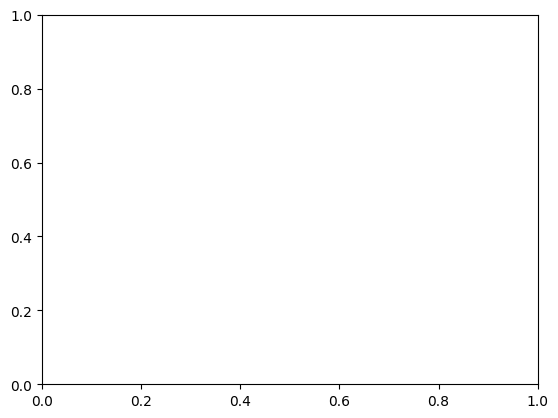

In [ ]:
from matplotlib import pyplot as plt
plt.cla()

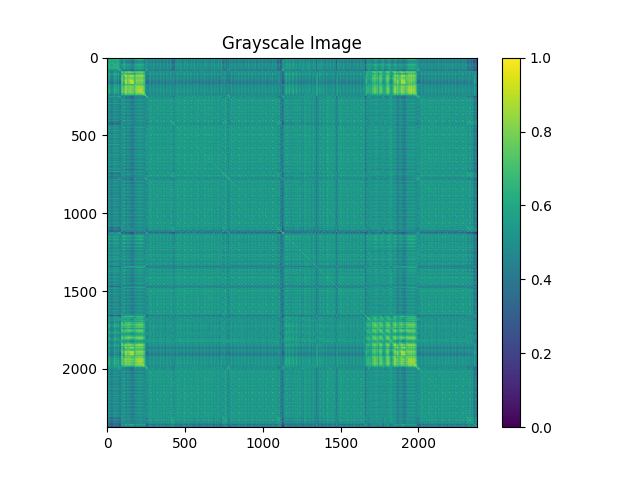

In [ ]:
%matplotlib ipympl
from matplotlib import pyplot as plt

def normalize_2d_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)

    normalized_arr = (arr - min_val) / (max_val - min_val)

    return normalized_arr

plt.imshow(normalize_2d_array(time_time_similarity.matrix), vmin=0, vmax=1)
plt.colorbar()
plt.title('Grayscale Image')
plt.show()
plt.savefig('imshow_plot_2K.png', dpi=200)
